In [1]:
%pip install pandas




Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
confirmed_df = pd.read_csv('sample_data/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('sample_data/time_series_covid19_deaths_global.csv')
confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/22,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178352,178373,178387,178418,178457,178513,178574,178611,178638,178648
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274376,274429,274462,274504,274520,274535,274606,274606,274737,274791


Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

#Transforming the Date format from 1/2/20 to YYYY-MM-DD (2020-01-02)
 

In [4]:
total_confirmed= confirmed_df.iloc[:, 4:].sum(axis=0)
total_death= death_df.iloc[:, 4:].sum(axis=0)

frame = { 'Covid Confirmed': total_confirmed, 'Covid Death': total_death }
aggregated_df = pd.DataFrame(frame )

as_list = aggregated_df.index.tolist()
new_list = []
for i in as_list:
    nums = i.split('/')
    month_leading_zero='0'
    if(int(nums[0]) > 9): month_leading_zero = ''

    day_leading_zero='0'
    if(int(nums[1]) > 9): day_leading_zero = ''

    new_list.append('20'+nums[2]+'-'+month_leading_zero+''+nums[0]+'-'+day_leading_zero+nums[1])

aggregated_df.index = new_list
aggregated_df = aggregated_df.transpose()
aggregated_df.head(5)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23
Covid Confirmed,557,657,944,1437,2120,2929,5580,6169,8237,9927,...,502932802,503645731,504198041,504619899,505089291,506082451,507046645,507947338,508708884,509196481
Covid Death,17,18,26,42,56,82,131,133,171,213,...,6193401,6195670,6197182,6198487,6199914,6203317,6207815,6211981,6215610,6217046


Alpha Vantage! API key: 91MNBSNGPV50MFCO. 

In [5]:
%pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.


In [7]:
from alpha_vantage.timeseries import TimeSeries
# ts = TimeSeries(key='91MNBSNGPV50MFCO')
# 
ts = TimeSeries(key='ED7TWFSOZVK81POS')
# Get json object with the intraday data and another with  the call's metadata


In [8]:
# series = pd.read_json(data, typ='series', orient='records')
# print(series)
# Google - Googl - American
data1, meta_data1 = ts.get_daily(symbol='GOOGL',outputsize='full')
# Royal Bank Canada Aka RBC - TSE - Canadian
data2, meta_data2 = ts.get_daily(symbol='TSE',outputsize='full')
# AirBnb - ABNB - Travel Sector
data3, meta_data3 = ts.get_daily(symbol='ABNB',outputsize='full')
# Annaly Capital Management Inc. - NLY - Real estate
data4, meta_data4 = ts.get_daily(symbol='NLY',outputsize='full')
# Gold - AU - Metal
data5, meta_data5 = ts.get_daily(symbol='AU',outputsize='full')

#Filling the NAN values of stocks with previous date values.

In [9]:
google_df = pd.DataFrame(data1)
google_df = google_df.ffill()

rbc_df = pd.DataFrame(data2)
rbc_df = rbc_df.ffill()

airbnb_df =pd.DataFrame(data3)
airbnb_df = airbnb_df.ffill()

nly_df = pd.DataFrame(data4)
nly_df = nly_df.ffill()

gold_df = pd.DataFrame(data5)
gold_df = gold_df.ffill()
gold_df.head(5)

,2022-04-25,2022-04-22,2022-04-21,2022-04-20,2022-04-19,2022-04-18,2022-04-14,2022-04-13,2022-04-12,2022-04-11,...,1999-11-12,1999-11-11,1999-11-10,1999-11-09,1999-11-08,1999-11-05,1999-11-04,1999-11-03,1999-11-02,1999-11-01
1. open,20.2100,21.3800,22.3000,22.3200,23.9000,24.1100,23.5100,23.8000,23.9300,24.4000,...,28.5000,28.9400,28.6300,28.1300,28.1900,28.8100,28.0600,27.3800,27.0600,27.5600
2. high,20.7100,21.7400,22.3000,22.7700,23.9900,24.9700,23.7300,24.1450,24.2300,24.4100,...,28.8800,28.9400,29.1900,28.9400,28.4400,28.9400,28.3800,28.0000,27.3100,27.5600
3. low,19.9200,20.9000,21.4700,22.0700,22.3500,23.9400,23.1563,23.5700,23.2200,22.8450,...,28.3800,28.6900,28.6300,27.6300,27.9400,28.5000,28.0000,27.3100,27.0000,26.8800
4. close,20.4200,21.1700,21.7700,22.6900,22.5700,24.3000,23.6800,23.8900,23.5800,23.1200,...,28.6300,28.7500,29.1300,28.6300,28.3800,28.6300,28.2500,27.5600,27.3100,27.0000
5. volume,2901399,2607946,2659717,2177515,3747691,2725169,2515974,1752183,2644686,3360571,...,121700,155600,426400,267600,224600,328100,133300,190600,420700,247600


# Combining the data in order to align data according to time series

In [11]:
# print(aggregated_df.head(2))
def delete(transposed_df):
  return transposed_df.drop(columns=['1. open','2. high','3. low','4. close','5. volume'])
# print(google_df.loc('2. high'))
transposed_df= aggregated_df.transpose()
# American
transposed_df = transposed_df.append(google_df.transpose())
transposed_df['American high'] = transposed_df['2. high']
transposed_df['American low'] = transposed_df['3. low']
transposed_df = delete(transposed_df)
# Canadian
transposed_df = transposed_df.append(rbc_df.transpose())
transposed_df['Canadian high'] = transposed_df['2. high']
transposed_df['Canadian low'] = transposed_df['3. low']
transposed_df = delete(transposed_df)
#  Travel
transposed_df = transposed_df.append(airbnb_df.transpose())
transposed_df['Travel high'] = transposed_df['2. high']
transposed_df['Travel low'] = transposed_df['3. low']
transposed_df = delete(transposed_df)
#  Real Estate
transposed_df = transposed_df.append(nly_df.transpose())
transposed_df['Real Estate high'] = transposed_df['2. high']
transposed_df['Real Estate  low'] = transposed_df['3. low']
transposed_df = delete(transposed_df)
# Metal gold_df
transposed_df = transposed_df.append(gold_df.transpose())
transposed_df['Metal high'] = transposed_df['2. high']
transposed_df['Metal low'] = transposed_df['3. low']
# 
transposed_df = delete(transposed_df)
transposed_df = transposed_df.sort_index()
transposed_df=transposed_df.ffill(axis=0)

# Cleansing the data for COVID NaN values 
transposed_df = transposed_df.dropna()

#
transposed_df['American high'] = transposed_df['American high'].astype(float)
transposed_df['Canadian high'] = transposed_df['Canadian high'].astype(float) 
transposed_df['Travel high'] = transposed_df['Travel high'].astype(float) 
transposed_df['Real Estate high'] = transposed_df['Real Estate high'].astype(float) 
transposed_df['Metal high'] = transposed_df['Metal high'].astype(float) 

transposed_df.head(10)

,Covid Confirmed,Covid Death,American high,American low,Canadian high,Canadian low,Travel high,Travel low,Real Estate high,Real Estate low,Metal high,Metal low
2020-12-10,70543163.0,1638408.0,1774.99,1733.5270,44.4200,43.1600,165.0,141.2500,8.27,8.1500,22.070,21.2200
2020-12-11,70543163.0,1638408.0,1774.99,1733.5270,44.4200,43.1600,165.0,141.2500,8.28,8.2000,22.070,21.2200
2020-12-11,71251411.0,1651556.0,1774.99,1733.5270,44.4200,43.1600,165.0,141.2500,8.28,8.2000,22.070,21.2200
2020-12-11,71251411.0,1651556.0,1774.99,1733.5270,44.4200,43.1600,165.0,141.2500,8.28,8.2000,21.675,21.2800
2020-12-11,71251411.0,1651556.0,1777.31,1752.7400,44.4200,43.1600,165.0,141.2500,8.28,8.2000,21.675,21.2800
2020-12-11,71251411.0,1651556.0,1777.31,1752.7400,44.4200,43.1600,151.5,135.1000,8.28,8.2000,21.675,21.2800
2020-12-11,71251411.0,1651556.0,1777.31,1752.7400,43.7325,42.5600,151.5,135.1000,8.28,8.2000,21.675,21.2800
2020-12-12,71901617.0,1662469.0,1777.31,1752.7400,43.7325,42.5600,151.5,135.1000,8.28,8.2000,21.675,21.2800
2020-12-13,72441105.0,1670406.0,1777.31,1752.7400,43.7325,42.5600,151.5,135.1000,8.28,8.2000,21.675,21.2800
2020-12-14,72441105.0,1670406.0,1777.31,1752.7400,43.7325,42.5600,151.5,135.1000,8.35,8.2200,21.675,21.2800


# Visualization of the Data


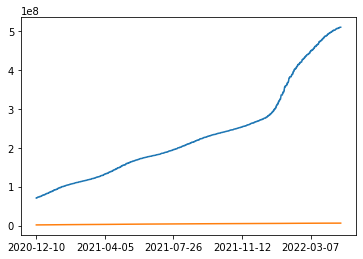

In [12]:
#The plot below shows a positive collinearity between number of cases and deaths with respect to time. 
#The number of cases increases as well as number of deaths(in larger numbers) with respect to time.

import matplotlib.pyplot as plt
graph_df = transposed_df

graph_df['Metal high'].describe() 
graph_df['Covid Confirmed'].describe() 

graph_df['Covid Confirmed'].plot()
graph_df['Covid Death'].plot()


plt.subplot()
plt.rcParams["figure.autolayout"] = True


In [13]:
index = graph_df.index
print(index)

Index(['2020-12-10', '2020-12-11', '2020-12-11', '2020-12-11', '2020-12-11',
       '2020-12-11', '2020-12-11', '2020-12-12', '2020-12-13', '2020-12-14',
       ...
       '2022-04-22', '2022-04-22', '2022-04-22', '2022-04-22', '2022-04-23',
       '2022-04-25', '2022-04-25', '2022-04-25', '2022-04-25', '2022-04-25'],
      dtype='object', length=2220)


No handles with labels found to put in legend.


<Figure size 1080x1440 with 0 Axes>

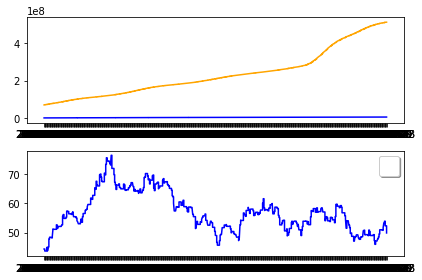

In [14]:
plt.figure(figsize=(15,20))
# Data for plotting
x = index
# Creating 6 subplots and unpacking the output array immediately
fig, (ax2, ax3) = plt.subplots(2,1)

ax2.plot(x, graph_df['Covid Confirmed'], color="orange")
ax2.plot(x, graph_df['Covid Death'], color="blue")

ax3.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax3.plot(x, graph_df['Canadian high'], color="Blue")
# transposed_df
#The plot below shows that covid negatively impacted stock prices of Royal Bank of Canada. As the number of deaths and cases increases, stock prices dropped.
#This means people were less willing to trade stocks as a result of the uncertainties covid. 

In [ ]:
fig, (ax2, ax3) = plt.subplots(2,1)
ax2.plot(x, graph_df['Covid Confirmed'], color="orange")
ax2.plot(x, graph_df['Covid Death'], color="blue")

ax3.plot(x, graph_df['American high'], color="green")
# On the other hand, the stock price of Google steadily increased despite covid outbreak.
# it dropped for a bit but covid had almost no negative impact on Google Stocks. 

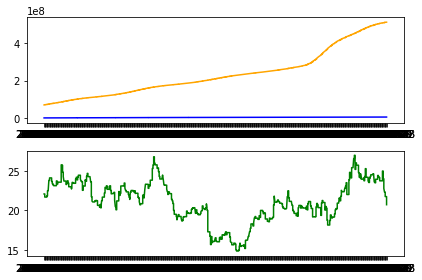

In [15]:
fig, (ax2, ax3) = plt.subplots(2,1)
ax2.plot(x, graph_df['Covid Confirmed'], color="orange")
ax2.plot(x, graph_df['Covid Death'], color="blue")

ax3.plot(x, graph_df['Metal high'], color="green")
# We again see here that despite covid affecting stock prices, it went up at one of the peak moments of covid spread before steadily decreasing.

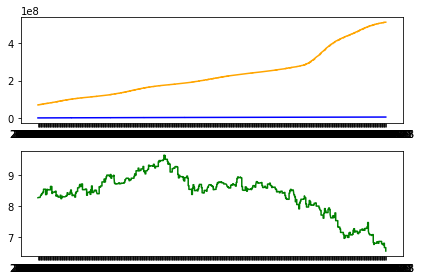

In [16]:
fig, (ax2, ax3) = plt.subplots(2,1)
ax2.plot(x, graph_df['Covid Confirmed'], color="orange")
ax2.plot(x, graph_df['Covid Death'], color="blue")

ax3.plot(x, graph_df['Real Estate high'], color="green")
# We can see a downward trend of stock prices as covid increased.
# People were afraid to commit their money into real estate thus crashing its stock prices.
# making houses available at cheaper prices yet less people confident to invest their money in it

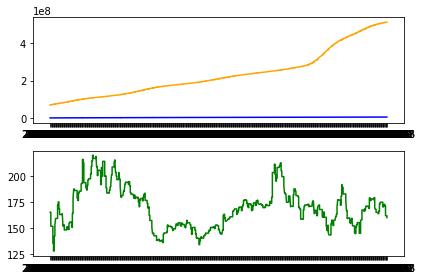

In [17]:
fig, (ax2, ax3) = plt.subplots(2,1)
ax2.plot(x, graph_df['Covid Confirmed'], color="orange")
ax2.plot(x, graph_df['Covid Death'], color="blue")

ax3.plot(x, graph_df['Travel high'], color="green")
# Lastly, stock prices for travel experienced some fluctuations between high,low, stable as covid cases increased.